<a href="https://colab.research.google.com/github/MyNameIsCalvinDavis/rowing_data/blob/main/Rowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

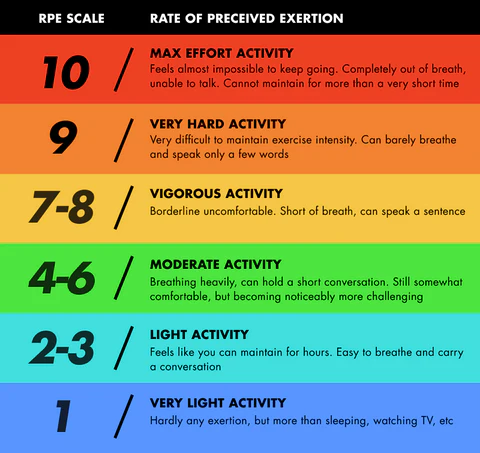

In [ ]:
hrmax = 200
hrmin = 58

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("data.csv").drop(columns=["Rest Time (Formatted)", "Rest Time (Seconds)", "Rest Distance", "Ranked", "Type", "Weight", "Age", "Date Entered", "Log ID"])
df

,Date,Description,Work Time (Formatted),Work Time (Seconds),Work Distance,Stroke Rate/Cadence,Stroke Count,Pace,Avg Watts,Cal/Hour,Total Cal,Avg Heart Rate,Drag Factor,Comments
0,2023-09-11 17:40:00,4x500m/3:00r row,7:29.0,449.0,2000,30.0,230.0,1:52.2,247,1151,142,188.0,110.0,4x500 (8x500)
1,2023-09-11 17:22:00,10:34 row,10:34.7,634.7,2247,18.0,201.0,2:21.2,124,727,126,143.0,103.0,Warmup
2,2023-09-06 14:15:00,31:37 row,31:37.7,1897.7,6804,18.0,602.0,2:19.4,129,744,389,159.0,102.0,UT2 RPE 3 HR 159
3,2023-08-31 18:08:00,1:02:17 row,1:02:17.0,3737.0,13523,19.0,1206.0,2:18.1,133,756,777,171.0,102.0,UT2 RPE 3 HR 168
4,2023-08-28 07:00:00,32:13 row,32:13.8,1933.8,7024,19.0,615.0,2:17.6,134,761,406,160.0,102.0,UT2 RPE 4 HR 155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2023-05-10 12:56:00,35:05 row,35:05.3,2105.3,8014,24.0,993.0,2:11.3,154,831,483,182.0,0.0,UT1 RPE 8.5 HR 183
61,2023-05-09 12:54:00,1:15:04 row,1:15:04.9,4504.9,15694,15.0,651.0,2:23.5,118,707,876,162.0,114.0,UT2 RPE 4 HR 162
62,2023-05-07 13:27:00,35:19 row,35:19.0,2119.0,8006,23.0,975.0,2:12.3,151,819,480,182.0,122.0,UT1 RPE 8 HR 182
63,2023-05-04 14:57:00,1:15:03 row,1:15:03.3,4503.3,15619,15.0,653.0,2:24.1,117,702,872,168.0,113.0,UT2 RPE 5 HR 168


In [ ]:


df = df.rename(columns={"Work Time (Formatted)":"Time", "Work Time (Seconds)": "Time (s)"})
df["RPE"] = df["Comments"].str.split().str[2]
df["Type"] = df["Comments"].str.split().str[0]
df["Date"] = df["Date"].str[5:16]
cmts = df[["Date", "Comments"]]
df = df[["Date", "Type", "Time", "Time (s)", "Pace", "RPE", "Work Distance", \
         "Stroke Rate/Cadence", "Avg Heart Rate", "Drag Factor", "Comments"]]

# Extra data
df.loc[len(df.index)] = ["04-29", "UT2", "1:15:05.0", 4505, "2:25.1", 4, 15522, 17, 151, "X", "X"]
df.loc[len(df.index)] = ["04-28", "UT1", "35:19.0", 2119, "2:12.0", 7, 8023, 25, 175, "X", "X"]
df.loc[len(df.index)] = ["04-25", "UT2", "1:15:06.0",4506, "2:26.4", 4, 15388, 16, 146, "X", "X"]
df.loc[len(df.index)] = ["04-24", "UT1", "30:39.0", 1839, "2:10.9", 8, 7020, 25, 180, "X", "X"]
df.loc[len(df.index)] = ["04-19", "UT2", "1:00:09.0", 3609, "2:18.6", 6, 13013, 18, 161, "X", "X"]
df.loc[len(df.index)] = ["04-18", "UT2", "1:00:03.0", 3603, "2:16.7", 6, 13170, 17, 162, "X", "X"]
df.loc[len(df.index)] = ["04-15", "UT1", "47:11.0", 2831, "2:13.4", 7, 10605, 17, 178, "X", "X"]

#df = df.merge(cmts, on="Date", how="left")
df["Date"] = df["Date"].str[:5]

# Fixing data
df.loc[df["Date"] == "05-14", "Stroke Rate/Cadence"] = 24.0

df

,Date,Type,Time,Time (s),Pace,RPE,Work Distance,Stroke Rate/Cadence,Avg Heart Rate,Drag Factor,Comments
0,09-11,4x500,7:29.0,449.0,1:52.2,NaN,2000,30.0,188.0,110.0,4x500 (8x500)
1,09-11,Warmup,10:34.7,634.7,2:21.2,NaN,2247,18.0,143.0,103.0,Warmup
2,09-06,UT2,31:37.7,1897.7,2:19.4,3,6804,18.0,159.0,102.0,UT2 RPE 3 HR 159
3,08-31,UT2,1:02:17.0,3737.0,2:18.1,3,13523,19.0,171.0,102.0,UT2 RPE 3 HR 168
4,08-28,UT2,32:13.8,1933.8,2:17.6,4,7024,19.0,160.0,102.0,UT2 RPE 4 HR 155
...,...,...,...,...,...,...,...,...,...,...,...
67,04-25,UT2,1:15:06.0,4506.0,2:26.4,4,15388,16.0,146.0,X,X
68,04-24,UT1,30:39.0,1839.0,2:10.9,8,7020,25.0,180.0,X,X
69,04-19,UT2,1:00:09.0,3609.0,2:18.6,6,13013,18.0,161.0,X,X
70,04-18,UT2,1:00:03.0,3603.0,2:16.7,6,13170,17.0,162.0,X,X


In [ ]:
# Fill in NAN values for HR if there are comments on that line
for idx, item in df.iterrows():
    if pd.isna(item["Avg Heart Rate"]):
        try:
            comment = item["Comments"].split(" ")
        except:
            print(item["Comments"])
        if not (comment[0].lower() == "warmup" or comment[0].lower() == "int"):
            df.loc[idx, "Avg Heart Rate"] = int(comment[4])

In [ ]:
df["PMAX"] = df["Avg Heart Rate"] / hrmax * 100
df["PMAX"] = df["PMAX"].astype(str).str[:-2] + "%"
df["Time (m)"] = df["Time (s)"] / 60
df["Pace"] = df["Pace"].str.replace(".", "").str.replace(":", ".").astype(float)
df = df.sort_values("Date")

<ipython-input-4-81087efee9c6>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Pace"] = df["Pace"].str.replace(".", "").str.replace(":", ".").astype(float)


In [ ]:
df

,Date,Type,Time,Time (s),Pace,RPE,Work Distance,Stroke Rate/Cadence,Avg Heart Rate,Drag Factor,Comments,PMAX,Time (m)
71,04-15,UT1,47:11.0,2831.0,2.134,7,10605,17.0,178.0,X,X,89%,47.183333
70,04-18,UT2,1:00:03.0,3603.0,2.167,6,13170,17.0,162.0,X,X,81%,60.050000
69,04-19,UT2,1:00:09.0,3609.0,2.186,6,13013,18.0,161.0,X,X,80%,60.150000
68,04-24,UT1,30:39.0,1839.0,2.109,8,7020,25.0,180.0,X,X,90%,30.650000
67,04-25,UT2,1:15:06.0,4506.0,2.264,4,15388,16.0,146.0,X,X,73%,75.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,08-28,UT2,32:13.8,1933.8,2.176,4,7024,19.0,160.0,102.0,UT2 RPE 4 HR 155,80%,32.230000
3,08-31,UT2,1:02:17.0,3737.0,2.181,3,13523,19.0,171.0,102.0,UT2 RPE 3 HR 168,85%,62.283333
2,09-06,UT2,31:37.7,1897.7,2.194,3,6804,18.0,159.0,102.0,UT2 RPE 3 HR 159,79%,31.628333
1,09-11,Warmup,10:34.7,634.7,2.212,NaN,2247,18.0,143.0,103.0,Warmup,71%,10.578333


In [ ]:
ut1 = df[df["Type"] == "UT1"]
ut1

,Date,Type,Time,Time (s),Pace,RPE,Work Distance,Stroke Rate/Cadence,Avg Heart Rate,Drag Factor,Comments,PMAX,Time (m)
71,04-15,UT1,47:11.0,2831.0,2.134,7,10605,17.0,178.0,X,X,89%,47.183333
68,04-24,UT1,30:39.0,1839.0,2.109,8,7020,25.0,180.0,X,X,90%,30.650000
66,04-28,UT1,35:19.0,2119.0,2.120,7,8023,25.0,175.0,X,X,87%,35.316667
64,05-02,UT1,35:06.6,2106.6,2.113,7,8016,23.0,175.0,126.0,UT1 RPE 7 HR 175,87%,35.110000
62,05-07,UT1,35:19.0,2119.0,2.123,8,8006,23.0,182.0,122.0,UT1 RPE 8 HR 182,91%,35.316667
60,05-10,UT1,35:05.3,2105.3,2.113,8.5,8014,24.0,182.0,0.0,UT1 RPE 8.5 HR 183,91%,35.088333
58,05-14,UT1,35:06.6,2106.6,2.128,6,7926,24.0,174.0,120.0,UT1 RPE 6 HR 168,87%,35.110000
56,05-17,UT1,35:01.1,2101.1,2.126,6,7917,23.0,169.0,0.0,UT1 RPE 6 HR 169,84%,35.018333
53,05-22,UT1,34:58.4,2098.4,2.126,7,7909,24.0,177.0,123.0,UT1 RPE 7 HR 174,88%,34.973333
52,05-25,UT1,35:59.3,2159.3,2.140,6,8057,24.0,167.0,121.0,UT1 RPE 6 HR 167,83%,35.988333


In [ ]:
ut2 = df[df["Type"] == "UT2"]
ut2

,Date,Type,Time,Time (s),Pace,RPE,Work Distance,Stroke Rate/Cadence,Avg Heart Rate,Drag Factor,Comments,PMAX,Time (m)
70,04-18,UT2,1:00:03.0,3603.0,2.167,6,13170,17.0,162.0,X,X,81%,60.050000
69,04-19,UT2,1:00:09.0,3609.0,2.186,6,13013,18.0,161.0,X,X,80%,60.150000
67,04-25,UT2,1:15:06.0,4506.0,2.264,4,15388,16.0,146.0,X,X,73%,75.100000
65,04-29,UT2,1:15:05.0,4505.0,2.251,4,15522,17.0,151.0,X,X,75%,75.083333
63,05-04,UT2,1:15:03.3,4503.3,2.241,5,15619,15.0,168.0,113.0,UT2 RPE 5 HR 168,84%,75.055000
61,05-09,UT2,1:15:04.9,4504.9,2.235,4,15694,15.0,162.0,114.0,UT2 RPE 4 HR 162,81%,75.081667
59,05-12,UT2,1:15:00.0,4500.0,2.210,3,15957,NaN,160.0,NaN,UT2 RPE 3 HR 160,80%,75.000000
57,05-16,UT2,1:15:02.8,4502.8,2.209,5,15974,15.0,149.0,108.0,UT2 RPE 5 HR 148,74%,75.046667
55,05-18,UT2,1:14:59.2,4499.2,2.209,3,15965,16.0,135.0,111.0,UT2 RPE 3 HR 135,67%,74.986667
54,05-21,UT2,1:14:57.8,4497.8,2.213,5,15910,16.0,172.0,114.0,UT2 RPE 5 HR 172,86%,74.963333


# UT1 / UT2 HR vs Split

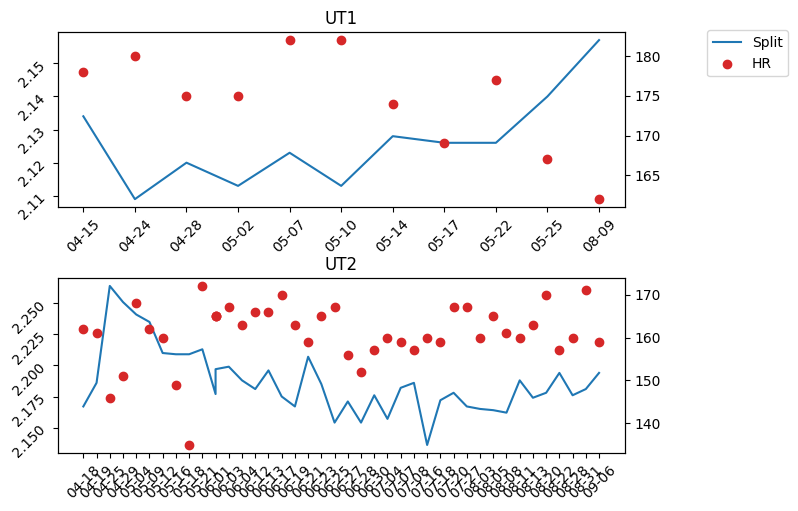

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.tight_layout(h_pad=3)

axs[0].set_title("UT1")
axs[0].tick_params(labelrotation=45)
l1 = axs[0].plot(ut1["Date"], ut1["Pace"], label="Split")[0]
l2 = axs[0].twinx().scatter(ut1["Date"], ut1["Avg Heart Rate"], label="HR", color="tab:red")

axs[1].set_title("UT2")
axs[1].tick_params(labelrotation=45)
axs[1].plot(ut2["Date"], ut2["Pace"], label="Split")
axs[1].twinx().scatter(ut2["Date"], ut2["Avg Heart Rate"], label="HR", color="tab:red")

axs[0].legend(handles=[l1, l2], bbox_to_anchor=(1.3, 1.05))

#UT1 / UT2 Pace vs Distance

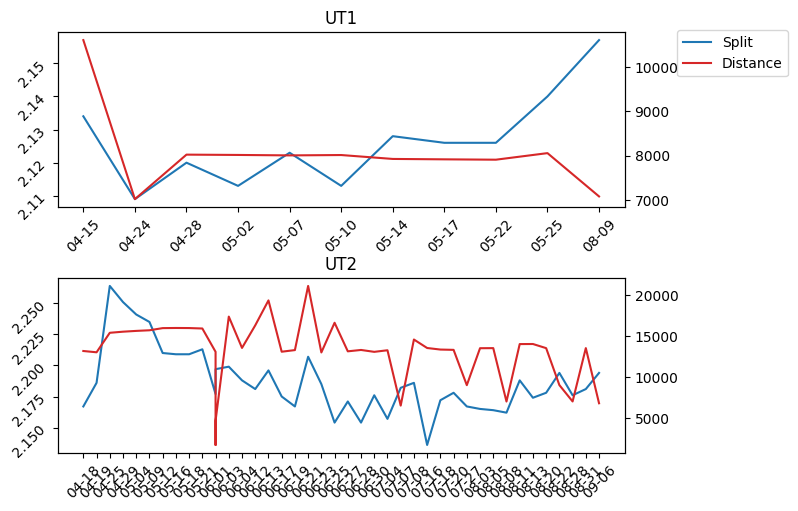

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.tight_layout(h_pad=3)

axs[0].set_title("UT1")
axs[0].tick_params(labelrotation=45)
l1 = axs[0].plot(ut1["Date"], ut1["Pace"], label="Split")[0]
l2 = axs[0].twinx().plot(ut1["Date"], ut1["Work Distance"], label="Distance", color="tab:red")[0]

axs[1].set_title("UT2")
axs[1].tick_params(labelrotation=45)
axs[1].plot(ut2["Date"], ut2["Pace"], label="Split")
axs[1].twinx().plot(ut2["Date"], ut2["Work Distance"], label="Distance", color="tab:red")

axs[0].legend(handles=[l1, l2], bbox_to_anchor=(1.3, 1.05))

#UT1 / UT2 Split vs RPE

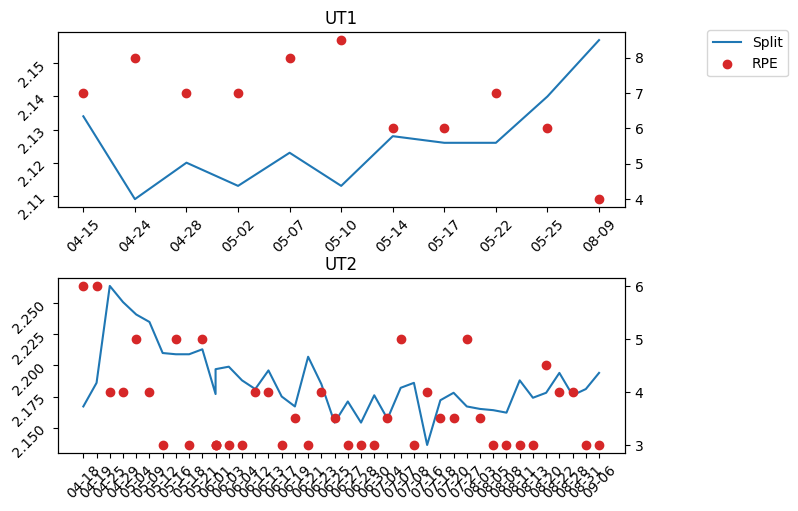

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.tight_layout(h_pad=3)

axs[0].set_title("UT1")
axs[0].tick_params(labelrotation=45)
l1 = axs[0].plot(ut1["Date"], ut1["Pace"], label="Split")[0]
l2 = axs[0].twinx().scatter(ut1["Date"], ut1["RPE"], label="RPE", color="tab:red")

axs[1].set_title("UT2")
axs[1].tick_params(labelrotation=45)
axs[1].plot(ut2["Date"], ut2["Pace"], label="Split")
axs[1].twinx().scatter(ut2["Date"], ut2["RPE"], label="RPE", color="tab:red")

axs[0].legend(handles=[l1, l2], bbox_to_anchor=(1.3, 1.05))

<ipython-input-11-f5f47e552128>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mo.groupby("Date").sum().plot(y=["Work Distance", "Time (s)"], kind="bar")


<Axes: xlabel='Date'>

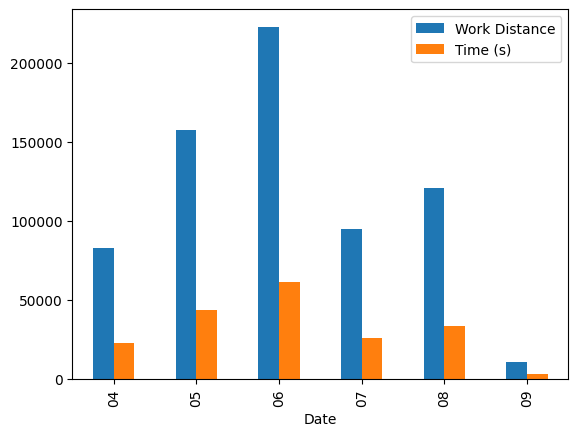

In [ ]:
df_mo = df.copy()
df_mo["Date"] = df_mo["Date"].str.split("-").str[0]
df_mo.groupby("Date").sum().plot(y=["Work Distance", "Time (s)"], kind="bar")

#UT2 HR over time

In [ ]:
ut2.tail()

,Date,Type,Time,Time (s),Pace,RPE,Work Distance,Stroke Rate/Cadence,Avg Heart Rate,Drag Factor,Comments,PMAX,Time (m)
7,08-20,UT2,1:02:06.9,3726.9,2.178,4.5,13519,19.0,170.0,99.0,UT2 RPE 4.5 HR 167,85%,62.115000
6,08-22,UT2,41:55.3,2515.3,2.194,4,9018,19.0,157.0,104.0,UT2 RPE 4 HR 153,78%,41.921667
4,08-28,UT2,32:13.8,1933.8,2.176,4,7024,19.0,160.0,102.0,UT2 RPE 4 HR 155,80%,32.230000
3,08-31,UT2,1:02:17.0,3737.0,2.181,3,13523,19.0,171.0,102.0,UT2 RPE 3 HR 168,85%,62.283333
2,09-06,UT2,31:37.7,1897.7,2.194,3,6804,18.0,159.0,102.0,UT2 RPE 3 HR 159,79%,31.628333


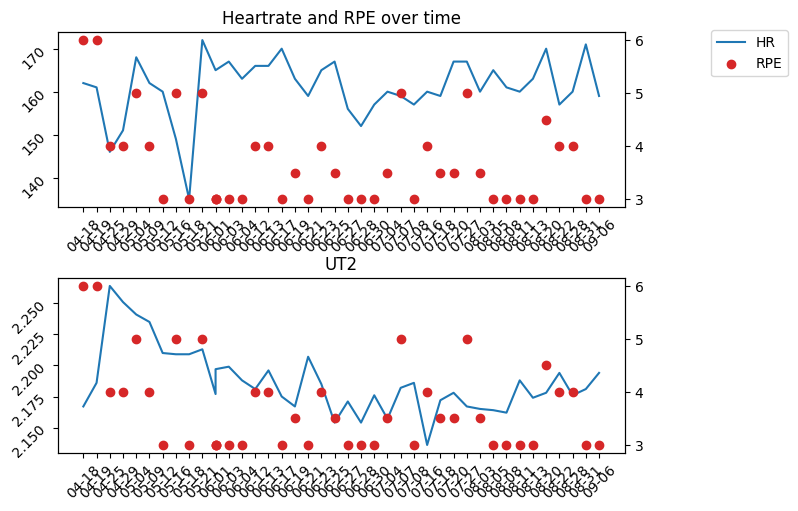

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.tight_layout(h_pad=3)

axs[0].set_title("Heartrate and RPE over time")
axs[0].tick_params(labelrotation=45)
l1 = axs[0].plot(ut2["Date"], ut2["Avg Heart Rate"], label="HR")[0]
l2 = axs[0].twinx().scatter(ut2["Date"], ut2["RPE"], label="RPE", color="tab:red")

axs[1].set_title("UT2")
axs[1].tick_params(labelrotation=45)
axs[1].plot(ut2["Date"], ut2["Pace"], label="Split")
axs[1].twinx().scatter(ut2["Date"], ut2["RPE"], label="RPE", color="tab:red")

axs[0].legend(handles=[l1, l2], bbox_to_anchor=(1.3, 1.05))